<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Modelos_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 32.3 MB/s 
     |████████████████████████████████| 9.8 MB 60.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [14]:
#Importar librerías 
#Tratamiento de datos
import pandas as pd 
import numpy as np
from scipy import stats
import statsmodels.api as sm

#Graficos 
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot

#Modelado y procesado
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima 
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Importar datos
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [4]:
dt=sm.datasets.sunspots.load_pandas().data
dt.index=pd.Index(sm.tsa.datetools.dates_from_range('1700','2008'))
del dt['YEAR']
dt.head(15)

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
1705-12-31,58.0
1706-12-31,29.0
1707-12-31,20.0
1708-12-31,10.0
1709-12-31,8.0


In [5]:
##Explorar los datos
dt.describe()

,SUNACTIVITY
count,309.000000
mean,49.752104
std,40.452595
min,0.000000
25%,16.000000
50%,40.000000
75%,69.800000
max,190.200000


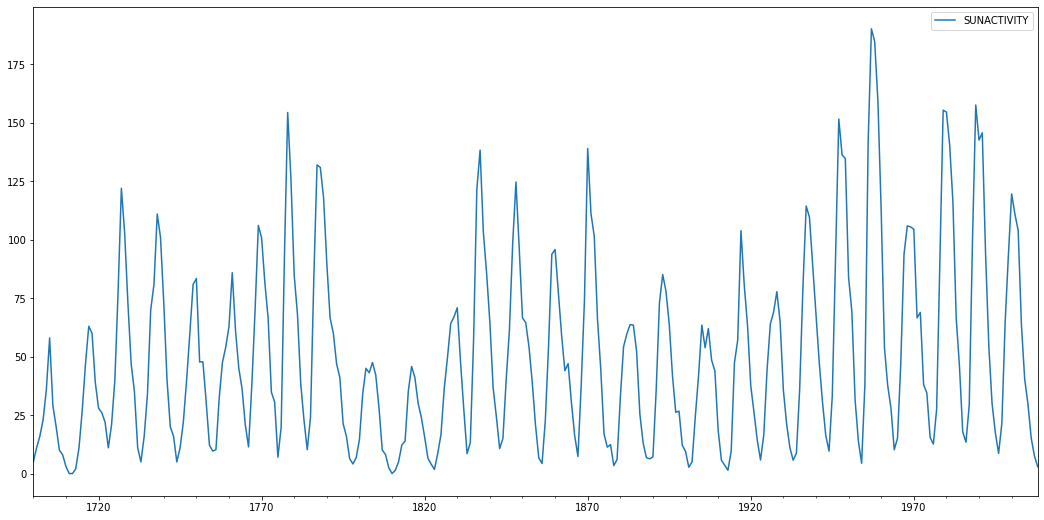

In [6]:
dt.plot(figsize=(18,9))

In [7]:
#Test de Dickey fuller 
print('Resultados del Test de Dickey Fuller')
array = np.asarray(dt,dtype='float')
np.nan_to_num(array, copy=False)
dftest = adfuller(array, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Prueba estadística','p-value','Retrasos usados','Numero de observaciones usadas'])
for key,value in dftest[4].items():
  dfoutput['Valor crítico (%s)' %key] = value
print(dfoutput)

Resultados del Test de Dickey Fuller
Prueba estadística                 -2.837781
p-value                             0.053076
Retrasos usados                     8.000000
Numero de observaciones usadas    300.000000
Valor crítico (1%)                 -3.452337
Valor crítico (5%)                 -2.871223
Valor crítico (10%)                -2.571929
dtype: float64


In [8]:
#preparación de los datos 
yEntrenamiento, yPrueba = train_test_split(dt, train_size=216)

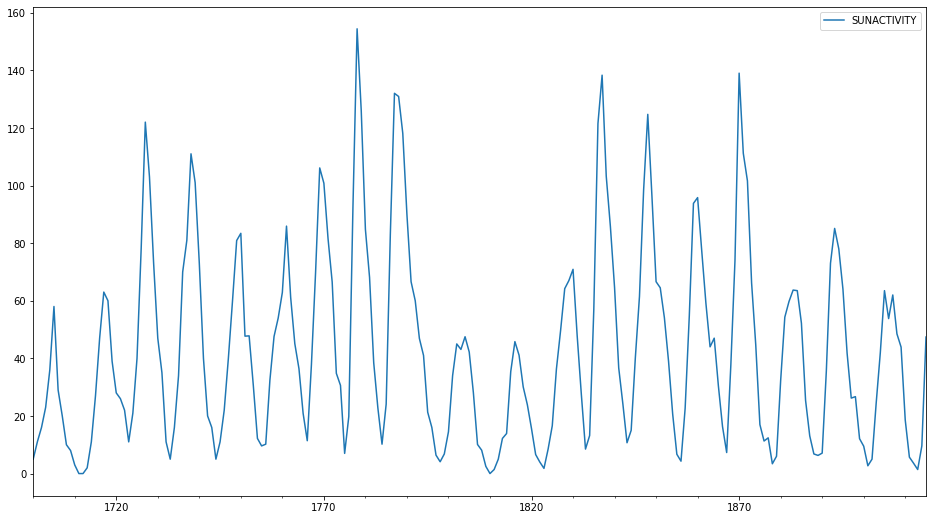

In [9]:
yEntrenamiento.plot(figsize=(16,9))

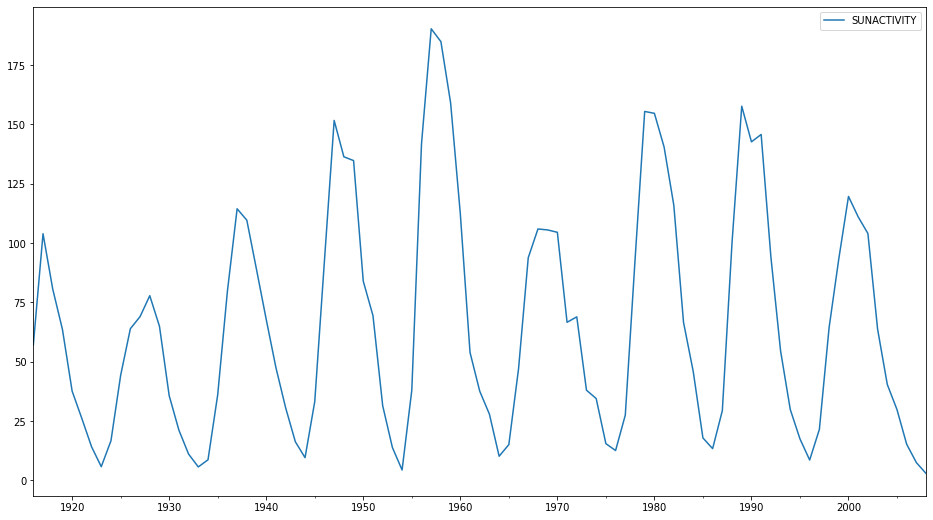

In [11]:
yPrueba.plot(figsize=(16,9))

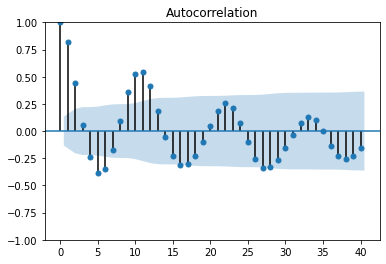

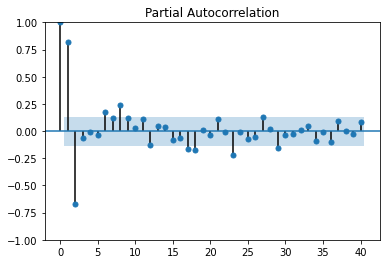

In [12]:
#Modelado
fig = sm.graphics.tsa.plot_acf(yEntrenamiento.values.squeeze(), lags=40)
fig = sm.graphics.tsa.plot_pacf(yEntrenamiento, lags=40)

In [16]:
#Ajustar el modelo 
modeloArima202= ARIMA(yEntrenamiento,order=(2,0,2))
ajuste = modeloArima202.fit()
print(ajuste.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  216
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -885.908
Date:                Fri, 27 May 2022   AIC                           1783.816
Time:                        02:12:30   BIC                           1804.067
Sample:                    12-31-1700   HQIC                          1791.997
                         - 12-31-1915                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.2501      3.759     11.504      0.000      35.882      50.618
ar.L1          1.4203      0.117     12.099      0.000       1.190       1.650
ar.L2         -0.7140      0.094     -7.632      0.0